In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
 #!python -m pip install --upgrade pip --trusted-host pypi.org --trusted-host files.pythonhosted.org
#!pip3 install pydotplus --trusted-host pypi.org --trusted-host files.pythonhosted.org
import pydotplus
import matplotlib.pyplot as plt

In [3]:
#!pip3 install Graphviz --trusted-host pypi.org 
#--trusted-host files.pythonhosted.org
import graphviz

In [4]:
data_dir='C:/Users/Animesh.Parikshya/Documents/IIM Classes/Data sets'

In [5]:
os.chdir(data_dir)

In [6]:
dat=pd.read_csv("credit_history.csv")

In [7]:
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [8]:
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [9]:
dat.describe()

,default,amount,years,income,age
count,7727.000000,7727.000000,7448.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.086332,6.337197e+04,27.542125
std,0.499568,6298.595800,6.700758,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,1.200000e+06,94.000000


In [10]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    7727 non-null   int64  
 1   amount     7727 non-null   int64  
 2   grade      7727 non-null   object 
 3   years      7448 non-null   float64
 4   ownership  7727 non-null   object 
 5   income     7727 non-null   float64
 6   age        7727 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 422.7+ KB


In [11]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [12]:
np.isnan(dat.years).sum()

279

In [13]:
np.isinf(dat.years).sum()

0

In [14]:
# replace wirth median (50% quantile) data
dat['years'].fillna(4,inplace=True)

In [15]:
X=dat.drop("default",axis=1)

In [16]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [17]:
#One hot encoding
X=pd.get_dummies(X)

In [18]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [19]:
y=dat['default']

In [20]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [21]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
# train the model
clf.fit(X_train,y_train)
# check the accuracy of the model
clf.score(X_test,y_test)

0.6274256144890039

In [22]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6721250820352787

-- area under he curve is more than .50 , so out DT is better than a naive classifier

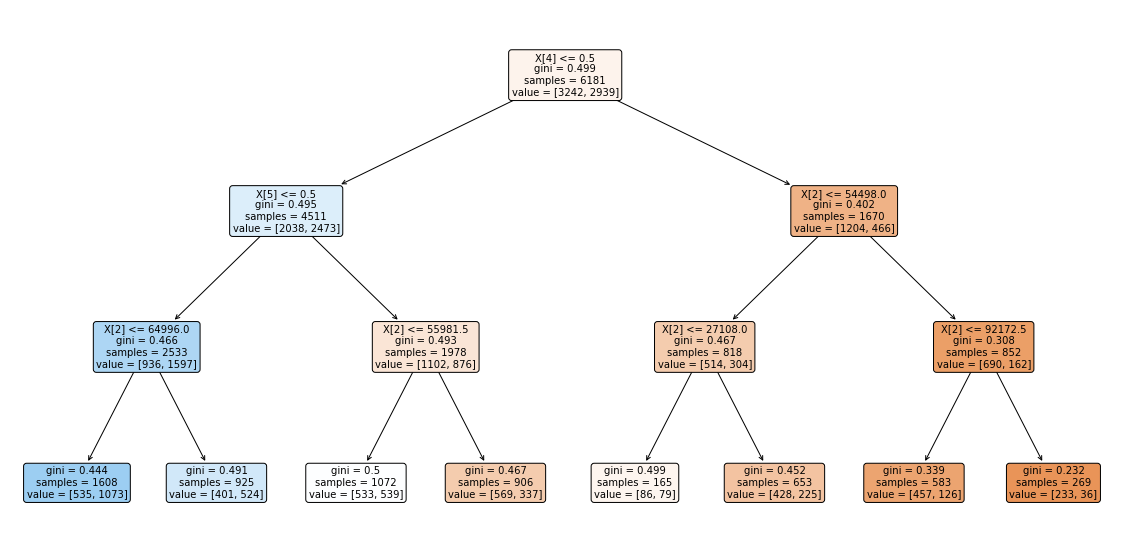

In [23]:
from sklearn import tree
 
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf, fontsize=10, filled=True, rounded=True)
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix 
#from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [25]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [26]:
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [27]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [28]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred))

In [29]:
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
# Operational Phase 
print("Results Using Gini Index:") 

# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 

print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
[0 0 0 ... 1 0 1]
Confusion Matrix:  [[441 347]
 [229 529]]
Accuracy :  62.74256144890039
Report :                precision    recall  f1-score   support

           0       0.66      0.56      0.60       788
           1       0.60      0.70      0.65       758

    accuracy                           0.63      1546
   macro avg       0.63      0.63      0.63      1546
weighted avg       0.63      0.63      0.63      1546

Results Using Entropy:
Predicted values:
[0 0 0 ... 1 0 1]
Confusion Matrix:  [[441 347]
 [229 529]]
Accuracy :  62.74256144890039
Report :                precision    recall  f1-score   support

           0       0.66      0.56      0.60       788
           1       0.60      0.70      0.65       758

    accuracy                           0.63      1546
   macro avg       0.63      0.63      0.63      1546
weighted avg       0.63      0.63      0.63      1546



In [30]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
os.chdir(data_dir)

In [31]:
os.environ["PATH"]

'C:\\Users\\Animesh.Parikshya\\Anaconda3;C:\\Users\\Animesh.Parikshya\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Animesh.Parikshya\\Anaconda3\\Library\\usr\\bin;C:\\Users\\Animesh.Parikshya\\Anaconda3\\Library\\bin;C:\\Users\\Animesh.Parikshya\\Anaconda3\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\windows\\system32;C:\\windows;C:\\windows\\System32\\Wbem;C:\\windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\windows\\System32\\OpenSSH\\;C:\\Program Files (x86)\\PIPC\\bin\\;C:\\Program Files\\PIPC\\bin\\;C:\\Program Files (x86)\\Plantronics\\Spokes3G\\;C:\\Program Files\\1E\\Client\\Extensibility\\NomadBranch;C:\\Apps\\Anaconda;C:\\Apps\\Anaconda\\Library\\mingw-w64\\bin;C:\\Apps\\Anaconda\\Library\\usr\\bin;C:\\Apps\\Anaconda\\Library\\bin;C:\\Apps\\Anaconda\\Scripts;C:\\Users\\Animesh.Parikshya\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\Animesh.Parikshya\\AppData\\Local\\Programs\\Microsoft VS Code\\bin;C:\\Program Files (x86)\\Graphviz2.38\\bi

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [34]:
from IPython.display import Image
#from sklearn.tree import export_graphviz
#import graphviz

In [35]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Grid Search-Cross Validation

In [ ]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [ ]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

In [ ]:
mod.best_estimator_

In [ ]:
mod.best_score_